# Nova Lite with v2.13 prompt

This notebook outlines the steps undertook to generate a prediction using Nova Lite with prompt from 2/13/25.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

from prediction_utils import predict
from evaluate_predictions import show_metrics

from instructions import nova_instructions_v213
MODEL_ID = "us.amazon.nova-lite-v1:0"
SYSTEM_PROMPT = nova_instructions_v213

# Load the data

In [2]:
df = pd.read_csv("data/dataset.csv")
df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN


# Use the model to generation predictions

In [3]:
%%time
predictions = predict(df, MODEL_ID, SYSTEM_PROMPT)
predictions[:2]

INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:botocore.tokens:Loading cached SSO token for flp-sso
INFO:root:Completed: 4
INFO:root:Completed: 3
INFO:root:Completed: 2
INFO:root:Completed: 0
INFO:root:Completed: 1
INFO:root:Completed: 7
INFO:root:Completed: 5
INFO:root:Completed: 6
INFO:root:Completed: 9
INFO:root:Completed: 8
INFO:root:Completed: 10
INFO:root:Completed: 12
INFO:root:Completed: 11
INFO:root:Completed: 14
INFO:root:Completed: 13
INFO:root:Completed: 15
INFO:root:Completed: 17
INFO:root:Completed: 16
INFO:root:Completed: 18
INFO:root:Completed: 19
INFO:root:Completed: 20
INFO:root:Completed: 22
INFO:root:Completed: 24
INFO:root:Completed: 21
INFO:root:Completed: 23
INFO:root:Completed: 25
INFO:root:Completed: 26
INFO:root:Completed: 28
INFO:root:Completed: 27
INFO:root:Completed: 29


CPU times: user 1min 2s, sys: 3.46 s, total: 1min 6s
Wall time: 5min 28s


[{'0005.91306_cites_88693.txt': {'model': 'us.amazon.nova-lite-v1:0',
   'input_tokens': 2073,
   'output_tokens': 62,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage does not contain any explicit or implicit negative actions against the Target Case. It merely references the Target Case and discusses the legal principles established in previous cases.',
   'raw_results': '```json\n{\n  "overruled": "no",\n  "confidence": 0.95,\n  "rationale": "The passage does not contain any explicit or implicit negative actions against the Target Case. It merely references the Target Case and discusses the legal principles established in previous cases."\n}\n```'}},
 {'0004.91306_cites_88240.txt': {'model': 'us.amazon.nova-lite-v1:0',
   'input_tokens': 2073,
   'output_tokens': 64,
   'prediction': 'no',
   'confidence': 0.95,
   'rationale': 'The passage reaffirms the grounds of the former decision in Texas v. Hardenberg and refers to it as satisfactory. There is no indic

In [4]:
prediction_df = pd.DataFrame([
    {"filename": filename, **details} 
    for prediction in predictions 
    for filename, details in prediction.items()
])
prediction_df.head()

,filename,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0005.91306_cites_88693.txt,us.amazon.nova-lite-v1:0,2073,62,no,0.950,The passage does not contain any explicit or i...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
1,0004.91306_cites_88240.txt,us.amazon.nova-lite-v1:0,2073,64,no,0.950,The passage reaffirms the grounds of the forme...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,us.amazon.nova-lite-v1:0,2113,72,no,0.950,The passage reaffirms the rules established in...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0001.91306_cites_88061.txt,us.amazon.nova-lite-v1:0,2868,79,yes,0.987,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
4,0002.91306_cites_88994.txt,us.amazon.nova-lite-v1:0,2592,86,no,0.980,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


## Save the raw prediction results

In [5]:
prediction_df.to_csv("predictions/5.amazon/1.nova_lite_v213_prompt.csv", index=False)

## Check if any datapoints did not get prediction results and need to be re-predicted or cleaned

In [6]:
prediction_df["prediction"].isna().sum()

0

In [7]:
# Here I manually reviewed these cases in Google Sheets and replaced with the cleaned version
#prediction_df = pd.read_csv("predictions/5.amazon/1.nova_lite_v213_prompt.csv")

In [8]:
prediction_df["prediction"].isna().sum()

0

# Combine the prediction results with label for evaluation

In [7]:
assert len(df) == len(prediction_df)

In [8]:
eval_df = df.merge(prediction_df, how="left", on="filename")
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.amazon.nova-lite-v1:0,2868,79,yes,0.987,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.amazon.nova-lite-v1:0,2592,86,no,0.980,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.amazon.nova-lite-v1:0,2113,72,no,0.950,The passage reaffirms the rules established in...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.amazon.nova-lite-v1:0,2073,64,no,0.950,The passage reaffirms the grounds of the forme...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.amazon.nova-lite-v1:0,2073,62,no,0.950,The passage does not contain any explicit or i...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


# Run evaluation

In [9]:
df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [10]:
eval_df["overruled"].value_counts()

overruled
no     935
yes    149
Name: count, dtype: int64

In [11]:
eval_df["prediction"].value_counts()

prediction
no     883
yes    201
Name: count, dtype: int64

In [12]:
eval_df["input_tokens"].sum()

3576150

In [13]:
eval_df["output_tokens"].sum()

98374

In [14]:
y_true = eval_df["overruled"].map({"yes": 1, "no": 0})
y_pred = eval_df["prediction"].map({"yes": 1, "no": 0, "partially": 1})

In [15]:
report = classification_report(y_true, y_pred, target_names=["No", "Yes"])
print(report)

              precision    recall  f1-score   support

          No       0.93      0.88      0.90       935
         Yes       0.44      0.59      0.50       149

    accuracy                           0.84      1084
   macro avg       0.68      0.73      0.70      1084
weighted avg       0.86      0.84      0.85      1084



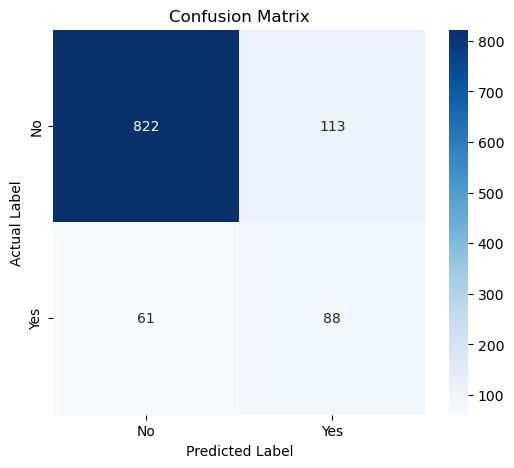

In [16]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
show_metrics(cm, y_true)

precision: of all predicted positives, how many were actual positives
recall: of all actual positives, how many we predicted to be positives
---------
METRICS
Accuracy: 0.84
Precision: 0.44
Recall: 0.59
F-score: 0.50
Specificity: 0.88
---------
DATASET
Total Responses: 1084
Total Positives: 149
Total Negatives: 935
---------
RECOUNT
True positives: 88
True negatives: 822
False positives: 113
False negatives: 61


In [18]:
confidently_wrong_positive = (eval_df["prediction"] == "yes") & (eval_df["overruled"] == "no") & (eval_df["confidence"] >= 0.8)
confidently_wrong_positive.sum()

113

In [19]:
confidently_wrong_negative = (eval_df["prediction"] == "no") & (eval_df["overruled"] == "yes") & (eval_df["confidence"] >= 0.8)
confidently_wrong_negative.sum()

61

# Save the evaluation df

In [20]:
eval_df.head()

,filename,citing_opinion_id,citing_index,court,docket_id,cluster_id,citing_decision_name,cited_opinion_id,cited_index,depth,cited_decision_name,overruled,notes,model,input_tokens,output_tokens,prediction,confidence,rationale,raw_results
0,0001.91306_cites_88061.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88061,0,3,Texas v. White (1869),yes,NaN,us.amazon.nova-lite-v1:0,2868,79,yes,0.987,The passage explicitly states that the positio...,"```json\n{\n ""overruled"": ""yes"",\n ""confiden..."
1,0002.91306_cites_88994.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88994,1,2,Vermilye & Co. v. Adams Express Co. (1875),no,NaN,us.amazon.nova-lite-v1:0,2592,86,no,0.980,"The passage discusses the Target Case, Vermily...","```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
2,0003.91306_cites_87633.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",87633,2,1,Murray v. Lardner (1865),no,NaN,us.amazon.nova-lite-v1:0,2113,72,no,0.950,The passage reaffirms the rules established in...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
3,0004.91306_cites_88240.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88240,3,1,Texas v. Hardenberg (1869),no,NaN,us.amazon.nova-lite-v1:0,2073,64,no,0.950,The passage reaffirms the grounds of the forme...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."
4,0005.91306_cites_88693.txt,91306,0,scotus,2297559,91306,"Morgan v. United States,113 U.S. 476 (1885)",88693,4,1,Huntington v. Texas (1873),no,NaN,us.amazon.nova-lite-v1:0,2073,62,no,0.950,The passage does not contain any explicit or i...,"```json\n{\n ""overruled"": ""no"",\n ""confidenc..."


In [21]:
eval_df.to_csv("predictions/5.amazon/1.nova_lite_v213_prompt_eval.csv", index=False)